<a href="https://colab.research.google.com/github/raza4729/BlindAid/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: k-nearest neighbors (Programming) 

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

In [1]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


def load_breast_cancer_dataset():
    from sklearn import datasets
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    return X, y
    
X, y = load_breast_cancer_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


==> *Write your response here.* (double klick here to edit)

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [2]:
# Number of samples
X.shape

(569, 30)

In [3]:
# Author: Erdem
# Number of samples
X.shape[0], len(X)

(569, 569)

In [4]:
# Number of samples
unique, counts = np.unique(y, return_counts=True)
print("Classes : ", unique)
print("Samples : ", counts)

Classes :  [0 1]
Samples :  [212 357]


In [ ]:
# Mean for each input feature
print(np.mean(X, axis=0))

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]


In [5]:
# standard deviation for each input feature
print(np.std(X, axis=0))

[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


3) Visualize the variables *radius (mean)* and *texture (mean)* in a scatter plot (*radius (mean)* on the x-axis, *texture (mean)* on the y-axis). Color each point of the plot according to its class.

In [6]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

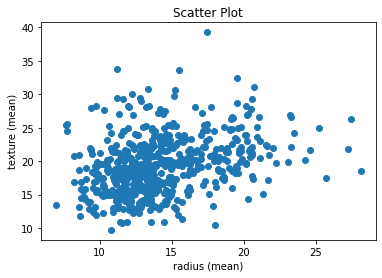

In [7]:
# Implement your solution here.
plt.scatter(X[:,[0]], X[:,[1]])
plt.xlabel('radius (mean)')
plt.ylabel('texture (mean)')
plt.title('Scatter Plot')
plt.show()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [8]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    X_train, X_test = np.array_split(X,  [int(0.7 * X.shape[0])])
    y_train, y_test = np.array_split(y,  [int(0.7 * len(y))])

    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [10]:
# Data Normalization
def Normalization(X, min_, max_):
    return (X - min_) / (max_ - min_)

min_ = X_train.min()
max_ = X_train.max()
X_train = Normalization(X_train, min_, max_)
X_test = Normalization(X_test, min_, max_)

## Task 2: k-nearest neighbors 
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [11]:
from numpy.ma.core import true_divide
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Array to store predicted labels
        pred_labels = np.array([])
        # Loop through the test samples to be classified
        for i in range(X.shape[0]):

          k_dist_idxs = 0

          # Array to store distance values between samples
          euc_dist = np.array([])

          # Array to stores final decision set
          pred_pool = np.array([])
          
          # Loop through the train samples to be calculated the euclidian distance between test and train sample
          for j in range(self.X.shape[0]):

            # Calculate the euclidean distance between test and train sample
            # Append resultant value to the distance storage array
            euc_dist = np.append(euc_dist, euclidean_distance(X[i], self.X[j]))
          
          # Sort the array while preserving the indexes to find out nearest neighbours
          # Keep the first K neighbours
          k_dist_idxs = euc_dist.argsort()[:self.k]
          
          pred_pool = np.append(pred_pool, self.y[k_dist_idxs])  

          values, counts = np.unique(pred_pool, return_counts=True)

          # condition if the weighing metric is distance
          if self.weights == 'distance':
            pool = zip(pred_pool, np.sort(euc_dist)[:self.k]) 
            pred_labels = np.append(pred_labels, weighted_distance(pool, self.y, self.k))

          # condition if the weighing metric is uniform
          else:  
            majortity_class = np.argmax(counts) 
            
            pred_labels = np.append(pred_labels, majortity_class)
            
          
        return pred_labels

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

def  weighted_distance(pred_pool, true_y, k=1):
  """
  returns the label based on max inverse distance function.
  The output will be class B.
  """

  # count and extracts unique labels 
  true_labels, true_labels_counts = np.unique(true_y, return_counts=True)

  # list to store weights for each label 
  weights = [0]*len(true_labels)

  # looping through the true and predicted labels to calculate weights based on IDF
  for pred in pred_pool:
    
    for true in true_labels:
      
      if pred[0] == true:
        weights[true] = (weights[true] + 1) / pred[1]
      
  return weights.index(max(weights))


In [12]:
obj  = KNearestNeighbors(1, 'distance')  # Distance
obj.fit(X_train, y_train)
predict_distance = obj.predict(X_train)
predict_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [13]:
obj  = KNearestNeighbors(1, 'unifrom')  # Uniform
obj.fit(X_train, y_train)
predict_uniform = obj.predict(X_test)
predict_uniform

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
# For test purposes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)  # Fit the model
knn_score = knn.score(X_test, y_test)
y_pred = knn.predict(X_train)  # Predict

print("\nTest accuracy: %.4f" % knn_score )
print("\nConfusion matrix: ", confusion_matrix(y_test, predict_uniform))
print("\nClassification report: ", classification_report(y_test, predict_uniform))
predict_uniform

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [15]:
# Author: Ali
def confusion_matrix(y_true, predictions):
  tp = fp = fn = tn = 0

  for true, pred in zip(y_true, predictions):
    if true == 1 and  pred == 1:
      tp = tp + 1
    if true == 0 and pred == 1:
      fp = fp + 1
    if true == 1 and pred == 0:
      fn = fn + 1
    if true == 0 and pred == 0: 
      tn = tn + 1

  return tp, fp, fn, tn


def precision(y_pred, y_true):

    tp, fp, fn, tn = confusion_matrix(y_true, y_pred)
    # print(tp, fp, fn, tn)
    return tp / (tp + fp) if (tp + fp) != 0 else 0 

def recall(y_pred, y_true):

    tp, fp, fn, tn = confusion_matrix(y_true, y_pred)
    return tp / (tp + fn) if (tp + fp) != 0 else 0

def f1score(y_pred, y_true):

    r = recall(y_pred, y_true)
    p = precision(y_pred, y_true)
    return (2 * (p * r)) / (p + r) if p !=0 and r != 0 else 0

print(confusion_matrix(y_train, predict_uniform))
print("Precision, ", "Recall, ", "F1-score")
precision(predict_uniform, y_test), recall(predict_uniform, y_test), f1score(predict_uniform, y_test)
# precision(predictions_uniform, y_test), recall(predictions_uniform, y_test), f1score(predictions_uniform, y_test)

(0, 0, 82, 89)
Precision,  Recall,  F1-score


(0, 0, 0)

2) Evaluate the performance of kNN with uniform weighting on the Breast Cancer dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [16]:
obj  = KNearestNeighbors(1)
obj.fit(X_train, y_train)
train_predictions_uniform = obj.predict(X_train)

obj  = KNearestNeighbors(5)
obj.fit(X_train, y_train)
train_predictions_uniform_k5 = obj.predict(X_train)

obj  = KNearestNeighbors(9)
obj.fit(X_train, y_train)
train_predictions__uniform_k9 = obj.predict(X_train)

obj  = KNearestNeighbors(1, 'distance')
obj.fit(X_train, y_train)
train_predictions_distance = obj.predict(X_train)

obj  = KNearestNeighbors(5, 'distance')
obj.fit(X_train, y_train)
train_predictions_distance_k5 = obj.predict(X_train)

obj  = KNearestNeighbors(9, 'distance')
obj.fit(X_train, y_train)
train_predictions_distance_k9 = obj.predict(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


In [17]:
print("************* Evaluation results for Uniform weighting *************")
print("\nEvaluatiion part k = 1")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions_uniform, y_train), recall(train_predictions_uniform, y_train), f1score(train_predictions_uniform, y_train))

print("\nEvaluatiion part k = 5")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions_uniform_k5, y_train), recall(train_predictions_uniform_k5, y_train), f1score(train_predictions_uniform_k5, y_train))

print("\nEvaluatiion part k = 9")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions__uniform_k9, y_train), recall(train_predictions__uniform_k9, y_train), f1score(train_predictions__uniform_k9, y_train))

************* Evaluation results for Uniform weighting *************

Evaluatiion part k = 1
Precision,  Recall,  F1-score
0 0 0

Evaluatiion part k = 5
Precision,  Recall,  F1-score
0.6216216216216216 0.10222222222222223 0.17557251908396948

Evaluatiion part k = 9
Precision,  Recall,  F1-score
0.7333333333333333 0.19555555555555557 0.3087719298245614


In [18]:
print("************* Evaluation results for distance weighting *************")
print("\nEvaluatiion part k = 1")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions_distance, y_train), recall(train_predictions_distance, y_train), f1score(train_predictions_distance, y_train))

print("\nEvaluatiion part k = 5")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions_distance_k5, y_train), recall(train_predictions_distance_k5, y_train), f1score(train_predictions_distance_k5, y_train))

print("\nEvaluatiion part k = 9")
print("Precision, ", "Recall, ", "F1-score")
print(precision(train_predictions_distance_k9, y_train), recall(train_predictions_distance_k9, y_train), f1score(train_predictions_distance_k9, y_train))

************* Evaluation results for distance weighting *************

Evaluatiion part k = 1
Precision,  Recall,  F1-score
1.0 1.0 1.0

Evaluatiion part k = 5
Precision,  Recall,  F1-score
1.0 1.0 1.0

Evaluatiion part k = 9
Precision,  Recall,  F1-score
1.0 1.0 1.0


In [19]:
obj  = KNearestNeighbors(1)
obj.fit(X_train, y_train)
predictions_uniform = obj.predict(X_test)

obj  = KNearestNeighbors(5)
obj.fit(X_train, y_train)
predictions_uniform_k5 = obj.predict(X_test)

obj  = KNearestNeighbors(9)
obj.fit(X_train, y_train)
predictions__uniform_k9 = obj.predict(X_test)

obj  = KNearestNeighbors(1, 'distance')
obj.fit(X_train, y_train)
predictions_distance = obj.predict(X_test)

obj  = KNearestNeighbors(5, 'distance')
obj.fit(X_train, y_train)
predictions_distance_k5 = obj.predict(X_test)

obj  = KNearestNeighbors(9, 'distance')
obj.fit(X_train, y_train)
predictions__distance_k9 = obj.predict(X_test)

In [20]:
print("************* Evaluation results for Uniform weighting *************")
print("\nEvaluatiion part k = 1")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions_uniform, y_test), recall(predictions_uniform, y_test), f1score(predictions_uniform, y_test))

print("\nEvaluatiion part k = 5")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions_uniform_k5, y_test), recall(predictions_uniform_k5, y_test), f1score(predictions_uniform_k5, y_test))

print("\nEvaluatiion part k = 9")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions__uniform_k9, y_test), recall(predictions__uniform_k9, y_test), f1score(predictions__uniform_k9, y_test))

************* Evaluation results for Uniform weighting *************

Evaluatiion part k = 1
Precision,  Recall,  F1-score
0 0 0

Evaluatiion part k = 5
Precision,  Recall,  F1-score
1.0 0.2196969696969697 0.36024844720496896

Evaluatiion part k = 9
Precision,  Recall,  F1-score
0.9534883720930233 0.3106060606060606 0.4685714285714285


In [21]:
print("************* Evaluation results for distance based weighting *************")
print("\nEvaluatiion part k = 1")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions_distance, y_test), recall(predictions_distance, y_test), f1score(predictions_distance, y_test))

print("\nEvaluatiion part k = 5")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions_distance_k5, y_test), recall(predictions_distance_k5, y_test), f1score(predictions_distance_k5, y_test))

print("\nEvaluatiion part k = 9")
print("Precision, ", "Recall, ", "F1-score")
print(precision(predictions__distance_k9, y_test), recall(predictions__distance_k9, y_test), f1score(predictions__distance_k9, y_test))

************* Evaluation results for distance based weighting *************

Evaluatiion part k = 1
Precision,  Recall,  F1-score
0.9682539682539683 0.9242424242424242 0.9457364341085271

Evaluatiion part k = 5
Precision,  Recall,  F1-score
0.984 0.9318181818181818 0.9571984435797666

Evaluatiion part k = 9
Precision,  Recall,  F1-score
0.984251968503937 0.946969696969697 0.9652509652509653


## Observations
### With Uniform weighting

* The voting method is misleading as we can see in the training part distance based metric is performing really well then `uniform distribution`. 

* Additinally, we are also unaware of the fact (domain knowledge!) about features in the data-set.

* But the question is why it is performing worse with `k=1`

### With distance weighting

* whereas in `distance based` weighting the perfomance of the model has shown gradul increament in the recall as well as precision! 

* Our model is outperforming the `sklearn` KNN model xD

Text(0, 0.5, 'Testing Precision')

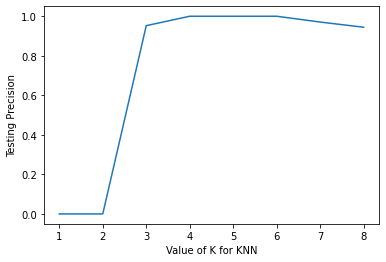

In [22]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

k_range = range(1, 9)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    obj  = KNearestNeighbors(k)
    obj.fit(X_train, y_train)
    predictions_uniform = obj.predict(X_test)
    scores.append(precision(predictions_uniform, y_test))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Precision')

Text(0, 0.5, 'Testing Recall')

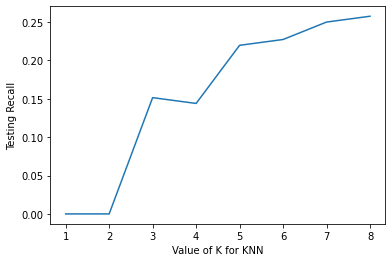

In [ ]:
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    obj  = KNearestNeighbors(k)
    obj.fit(X_train, y_train)
    predictions_uniform = obj.predict(X_test)
    scores.append(recall(predictions_uniform, y_test))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Recall')

Text(0, 0.5, 'Testing Precision')

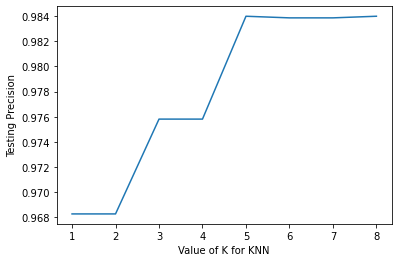

In [ ]:
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    obj  = KNearestNeighbors(k, 'distance')
    obj.fit(X_train, y_train)
    predictions_distance = obj.predict(X_test)
    scores.append(precision(predictions_distance, y_test))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Precision')

Text(0, 0.5, 'Testing Recall')

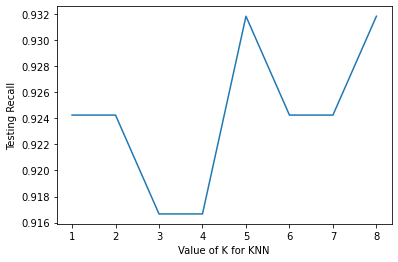

In [ ]:
# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    obj  = KNearestNeighbors(k, 'distance')
    obj.fit(X_train, y_train)
    predictions_distance = obj.predict(X_test)
    scores.append(recall(predictions_distance, y_test))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Recall')